# Creating Data with Generative AI - FloraBot
<div style="text-align: right">INFO 7390 Advances Data Sci/Architecture SEC 03 Spring 2024</div>
<div style="text-align: right">Nidhi Kulkarni</div>

#### Demo Link: https://youtu.be/AlNBwj71v-M

# Introduction

Generative AI models have made significant strides in understanding and generating visual content, demonstrating an ability to read and interpret images in ways that were previously challenging for machine learning systems. These advancements are primarily driven by the integration of deep learning techniques and architectures that are adept at processing and analyzing image data. Below, we explore the image-reading capabilities of generative AI models, focusing on their underlying technologies, applications, and future potential.

# Image Generation

Generative AI models, such as Generative Adversarial Networks (GANs) and Variational Autoencoders (VAEs), can create entirely new images based on the patterns and data they have learned during training. This has widespread applications in fields like:
- **Art and Entertainment**: Creating new artworks and visual content for games and movies.
- **Fashion and Design**: Generating new designs for clothes and accessories.
- **Virtual Reality**: Enhancing immersive environments by generating realistic textures and elements.

# Image Enhancement

AI models are also used to improve the quality of images through processes such as:
- **Super-resolution**: Enhancing the resolution of images beyond the camera's capture capabilities.
- **Denoising**: Removing noise from images to improve clarity, useful in medical imaging and astrophotography.
- **Colorization**: Automatically adding color to black-and-white images, useful in historical photo restoration.

# Image Editing

Generative AI enables sophisticated image editing capabilities that were previously impossible or required significant human effort, including:
- **Style Transfer**: Applying the style of one image to another, allowing for creative recompositions and artistic effects.
- **Object Removal and Addition**: Seamlessly adding or removing objects from images, useful in commercial photography and film production.

# Image Interpretation

AI models can interpret complex scenes and understand contextual information in images, which is critical in applications like:
- **Facial Recognition**: Identifying and verifying individuals in security systems.
- **Autonomous Vehicles**: Interpreting traffic scenes to navigate safely.
- **Medical Imaging**: Diagnosing diseases by analyzing medical scans.

## Advantages of Generative AI in Image Processing

1. **Efficiency**: AI can process and generate images much faster than manual methods, saving time and resources.
2. **Scalability**: Once trained, AI models can be scaled to handle large volumes of image data efficiently.
3. **Creativity**: Generative AI can produce creative outcomes that may not be intuitive for human artists, offering new perspectives and ideas.
4. **Customization**: AI can be tailored to meet specific needs in various industries, from personalized marketing content to targeted medical treatments.

## Challenges and Considerations

Despite its impressive capabilities, generative AI in image processing faces challenges such as:
- **Bias and Fairness**: AI models can perpetuate or amplify biases present in the training data, leading to fairness issues.
- **Ethical Concerns**: The ability of AI to generate realistic images raises concerns about privacy, consent, and the potential for misuse in creating deceptive content.
- **Quality and Authenticity**: Ensuring the quality and authenticity of AI-generated images remains a challenge, especially in contexts where accuracy is critical.

In conclusion, generative AI's ability to perform image processing is not only enhancing current technological capabilities but is also paving the way for innovations that were once considered science fiction. As these technologies evolve, they will continue to impact various aspects of society and industry.

# Technologies Enabling Image Reading in Generative AI

1. **Convolutional Neural Networks (CNNs):** At the heart of many image-processing AI models, CNNs are designed to automatically and adaptively learn spatial hierarchies of features from images. They are fundamental for tasks like image recognition and classification, allowing generative models to understand the content and context of images.

2. **Generative Adversarial Networks (GANs):** GANs are composed of two networks — a generator and a discriminator — that are trained simultaneously. While GANs are widely known for their ability to generate images, they also have the capability to interpret and modify images, learning detailed and complex representations of visual data.

3. **Variational Autoencoders (VAEs):** VAEs are generative models that learn a latent representation of input images, enabling them to generate new images that share similarities with the input data. Through their encoding-decoding process, VAEs can learn to read and reconstruct images, capturing their essential features.

4. **Transformer Models:** Although initially developed for natural language processing, transformer models have been adapted for image-related tasks (e.g., Vision Transformers, ViT). By applying the self-attention mechanism to patches of images, these models can process and understand images in a way that captures both local features and global context.

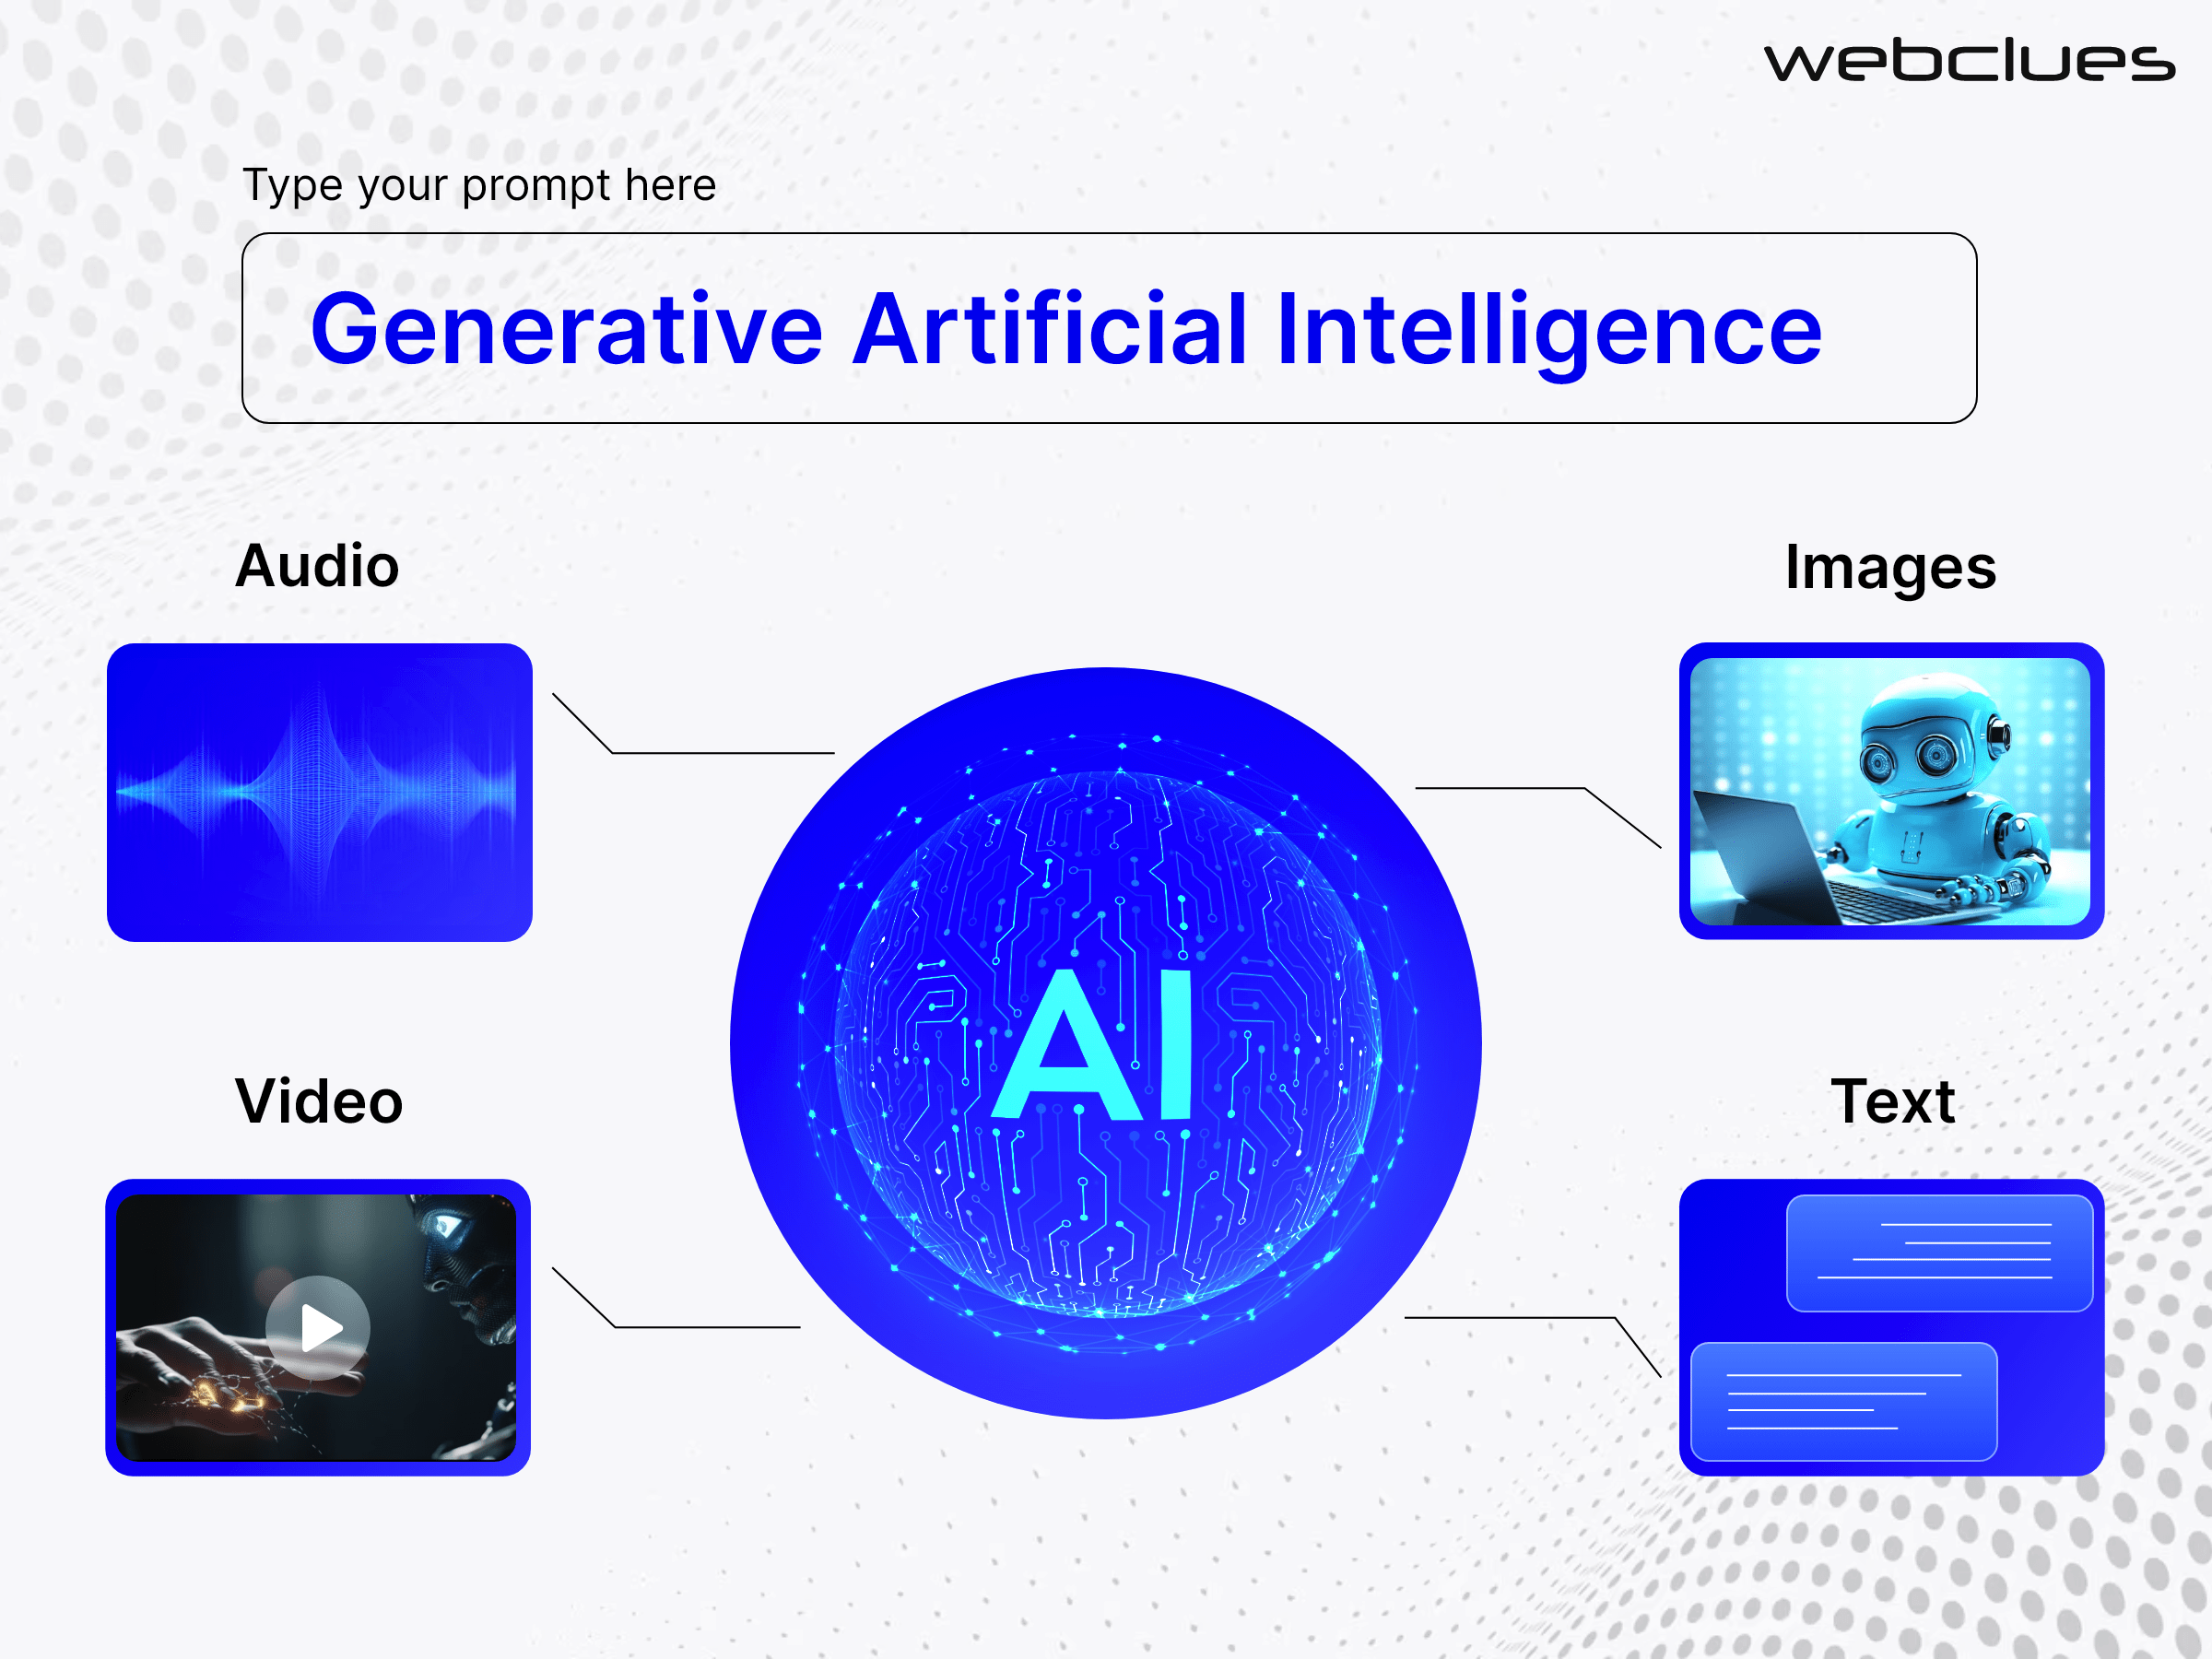

# Applications of Image Reading in Generative AI

- **Image Captioning:** Generative AI models can analyze the content of an image and generate descriptive captions, effectively bridging the gap between visual content and natural language.

- **Content-Based Image Retrieval:** By understanding the content of images, generative AI models can search for and retrieve images based on their content similarity to a query image.

- **Augmented Reality (AR) and Virtual Reality (VR):** Generative AI models can interpret real-world images to augment them with digital content, enhancing AR applications, or creating immersive VR environments.

- **Medical Image Analysis:** In healthcare, generative AI models can read and interpret medical images, assisting in diagnosis, treatment planning, and monitoring disease progression.


In [ ]:
import streamlit as st
import openai
from PIL import Image
from io import BytesIO
import base64
from openai import OpenAI
import os
import requests

In [ ]:
client = OpenAI(
api_key = os.getenv('OPENAI_API_KEY')
)

In [ ]:
# Title
st.markdown(
    f"""
    <h1 style="color: white; text-align: center; 
        font-size: 48px; 
        text-shadow: 2px 2px 2px LightBlue;">FloraBot</h1> 
    <hr/>
    """,
    unsafe_allow_html=True,
)

# Function to convert image to base64 (for embedding within prompts)
def img_to_base64(image):
    buffered = BytesIO()
    image.save(buffered, format="JPEG")
    img_str = base64.b64encode(buffered.getvalue()).decode()
    return f"data:image/jpeg;base64,{img_str}"

# Sidebar for image upload
with st.sidebar:
    uploaded_file = st.file_uploader("Upload a Flower Image", type=["png", "jpg", "jpeg"])
    if uploaded_file is not None:
        # Display the uploaded image
        image = Image.open(uploaded_file)
        st.image(image, caption='Uploaded Image.', use_column_width=True)
        img_base64 = img_to_base64(image)

    submit_button = st.button('Search')
        # Prepare the prompt
if submit_button:
    prompt = f"Identify the flower in this image and provide information about its name, species, and other relevant details. {img_base64}"
    response = client.chat.completions.create(
      model="gpt-4-vision-preview",
      messages=[
            {
      "role": "user",
      "content": [
      {"type": "text", "text": "Identify the flower in this image and provide information about its name, species, and other relevant details."},
            {
          "type": "image_url",
          "image_url": {
            "url": f"{img_base64}",
          },
        },
      ],
      }
    ],
      temperature=0.7,
      max_tokens=400,
      top_p=1.0,
      frequency_penalty=0.0,
      presence_penalty=0.0
  )

    # Display the response
    st.header("About this flower!")
    st.write(response.choices[0].message.content)

# Working of the Bot

The application, dubbed "FloraBot," aims to identify flowers from uploaded images and provide information about their name, species, and other relevant details using OpenAI's GPT model. Below is an explanation of the code, grounded in theoretical foundations:

### Streamlit Framework
Streamlit is a Python library that simplifies creating and sharing beautiful, custom web apps for machine learning and data science. In this script, Streamlit is used to create a user interface for uploading images and displaying results. It demonstrates the practical application of **declarative programming models** in quickly building interactive web applications without the need for complex web development frameworks.

### OpenAI's GPT Model
The application leverages OpenAI's Generative Pre-trained Transformer (GPT), a state-of-the-art language model known for its deep understanding of context and content generation capabilities. GPT models are pre-trained on a vast corpus of text data, allowing them to generate human-like text based on prompts. This is a practical application of **transfer learning**, where a model developed for one task is reused as the starting point for a model on a second task. Here, the task is generating descriptions and details about flowers based on their images.

### Image Processing with PIL
The Python Imaging Library (PIL), now known as Pillow, is used here to handle image data. The library provides extensive file format support, efficient internal representation, and powerful image processing capabilities. In the context of this application, PIL is used to convert the uploaded flower image into a base64-encoded string, enabling its integration into the text-based prompt for GPT. This process illustrates the **data encoding and preparation** aspect of machine learning and AI applications, highlighting the importance of preprocessing data into a suitable format for analysis or input into a model.

### Integration and Interaction
The code snippet showcases how different components of a machine learning application interact with each other:
- Streamlit creates a web interface for users to upload images.
- PIL processes these images and converts them to a base64-encoded string, a common method for embedding binary data (like images) within text-based formats.
- The base64 string is then included in a prompt sent to the GPT model, demonstrating an innovative approach to **multimodal learning**, where a model processes more than one type of input data (text and images in this case) to perform its task.
- Finally, the GPT model's response, presumably containing the identified flower's information, is displayed back to the user via the Streamlit app.

### Theoretical Foundations in Practice
This application effectively brings together concepts from **deep learning** (GPT's understanding and generation of text based on complex models trained on large datasets), **computer vision** (processing and understanding images with PIL), and **software development** (creating interactive, user-facing applications with Streamlit). It also touches on aspects of **natural language processing** (NLP) by using language models to interpret prompts and generate meaningful responses. Moreover, it leverages the idea of **embeddings** (converting images to a base64 string) to bridge the gap between visual data and text-based AI models.

In summary, the "FloraBot" application is a practical embodiment of how modern AI technologies can be integrated to create sophisticated, user-friendly applications that leverage the power of generative AI for specific tasks like identifying flowers from images.

# Demonstration of the FloraBot

The usage of FloraBot is simple, the user must upload the picture of a flower that he is curious about. The information about the flower is displayed including the species and where can the flower be found etc.

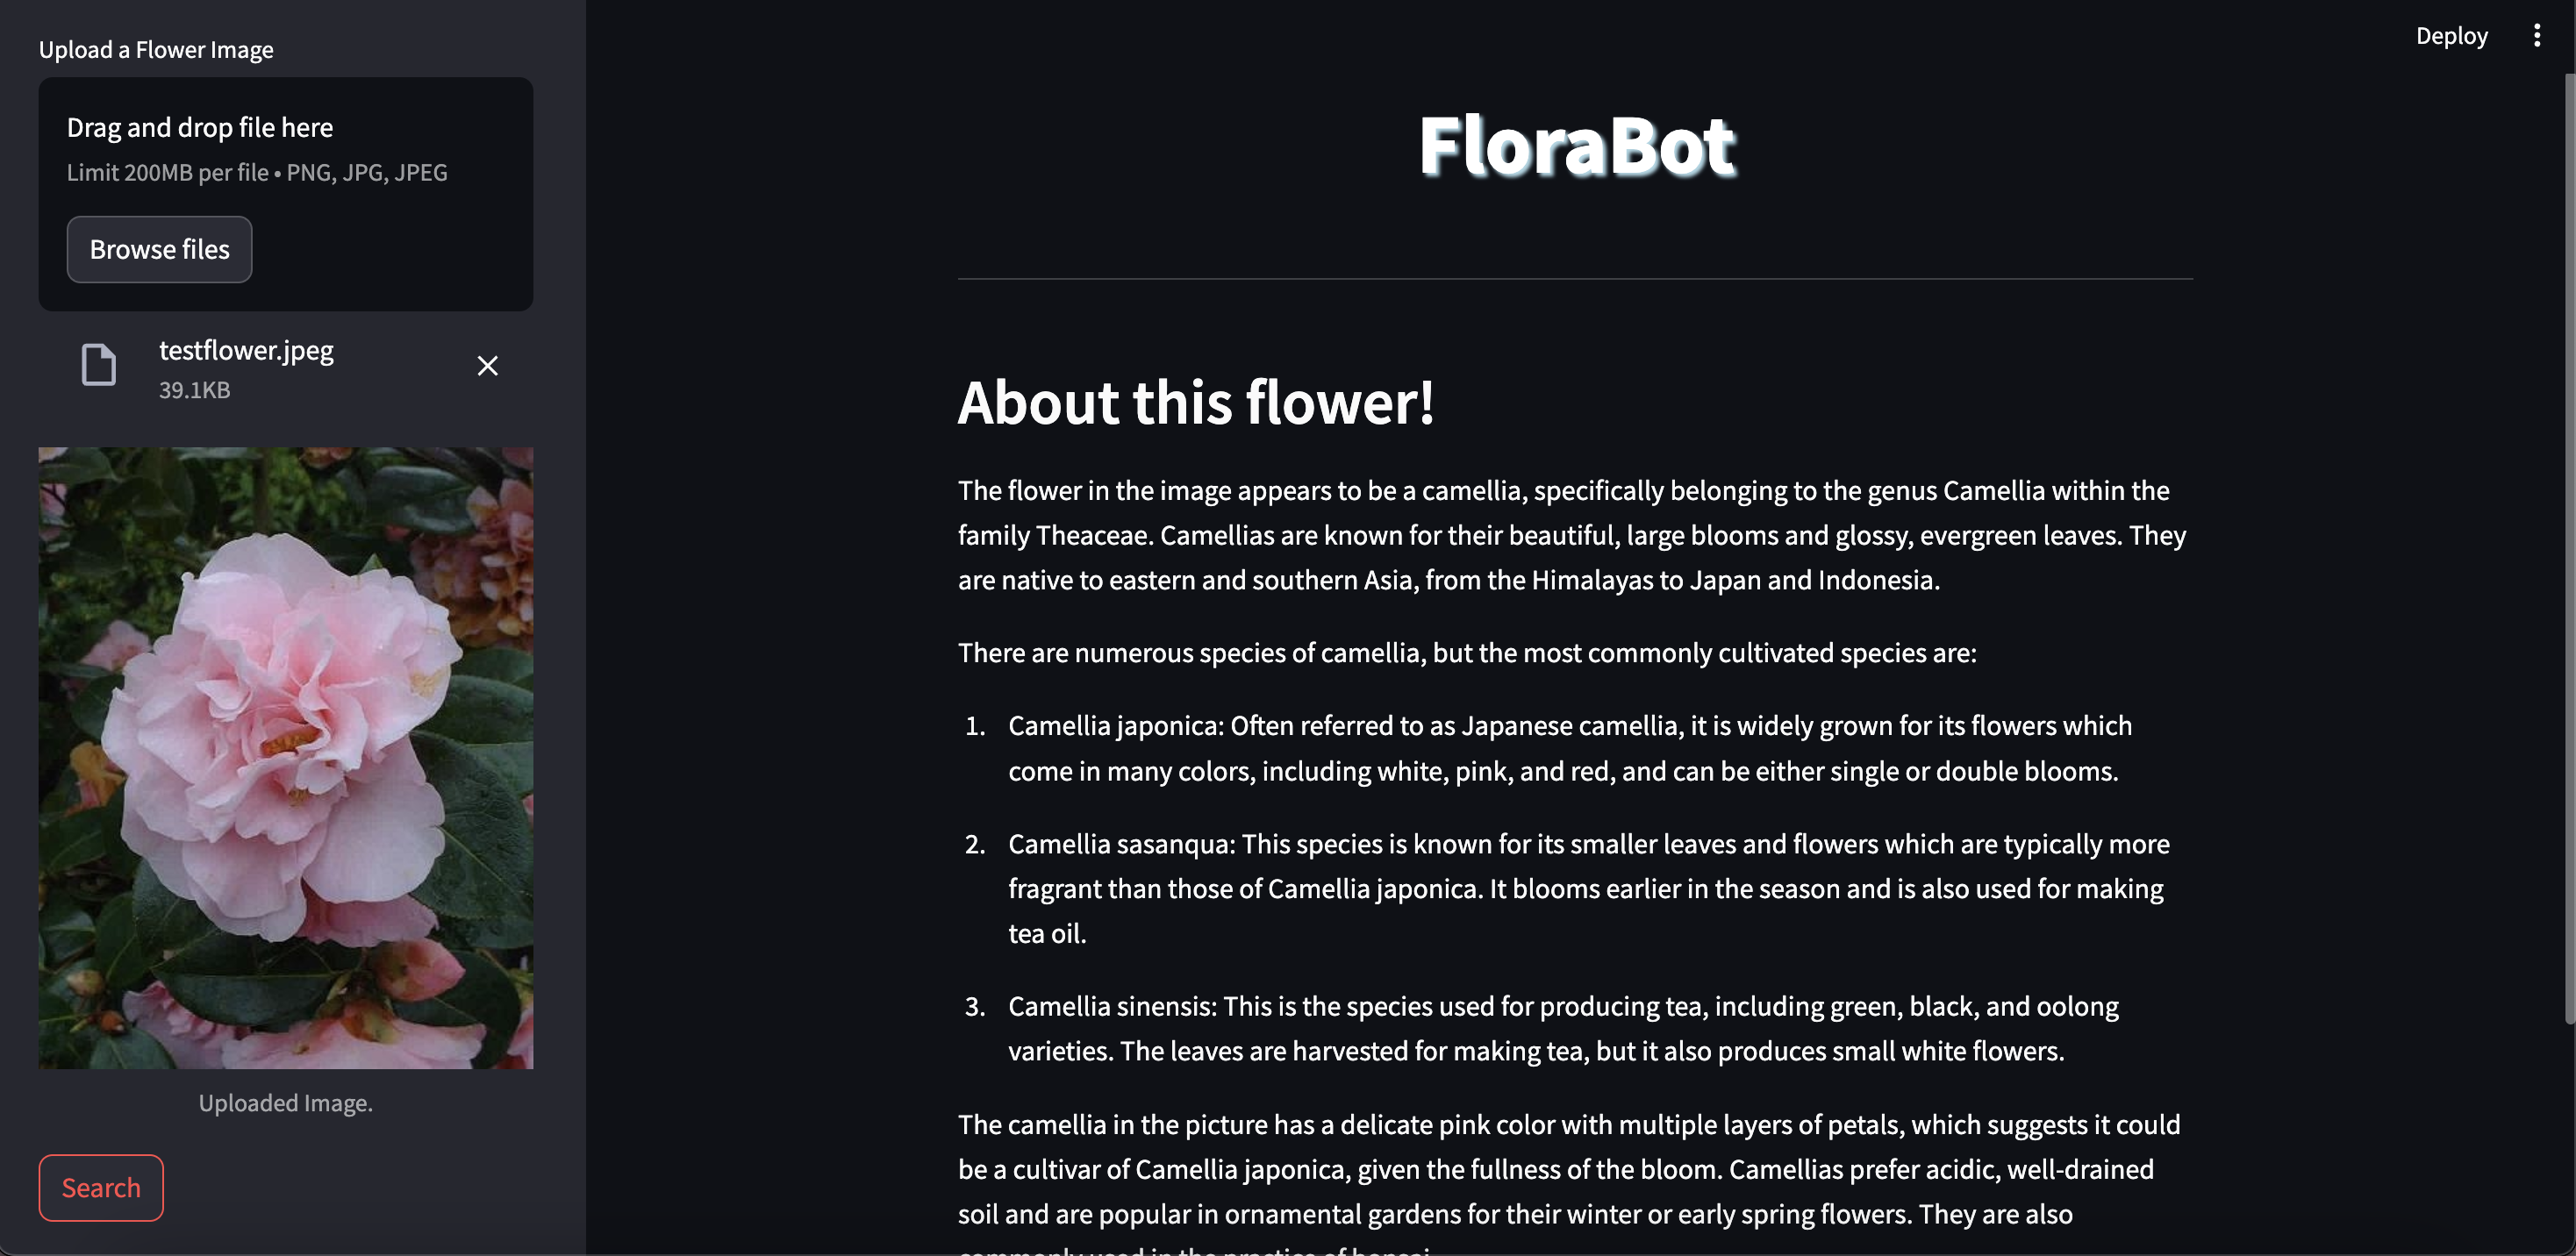

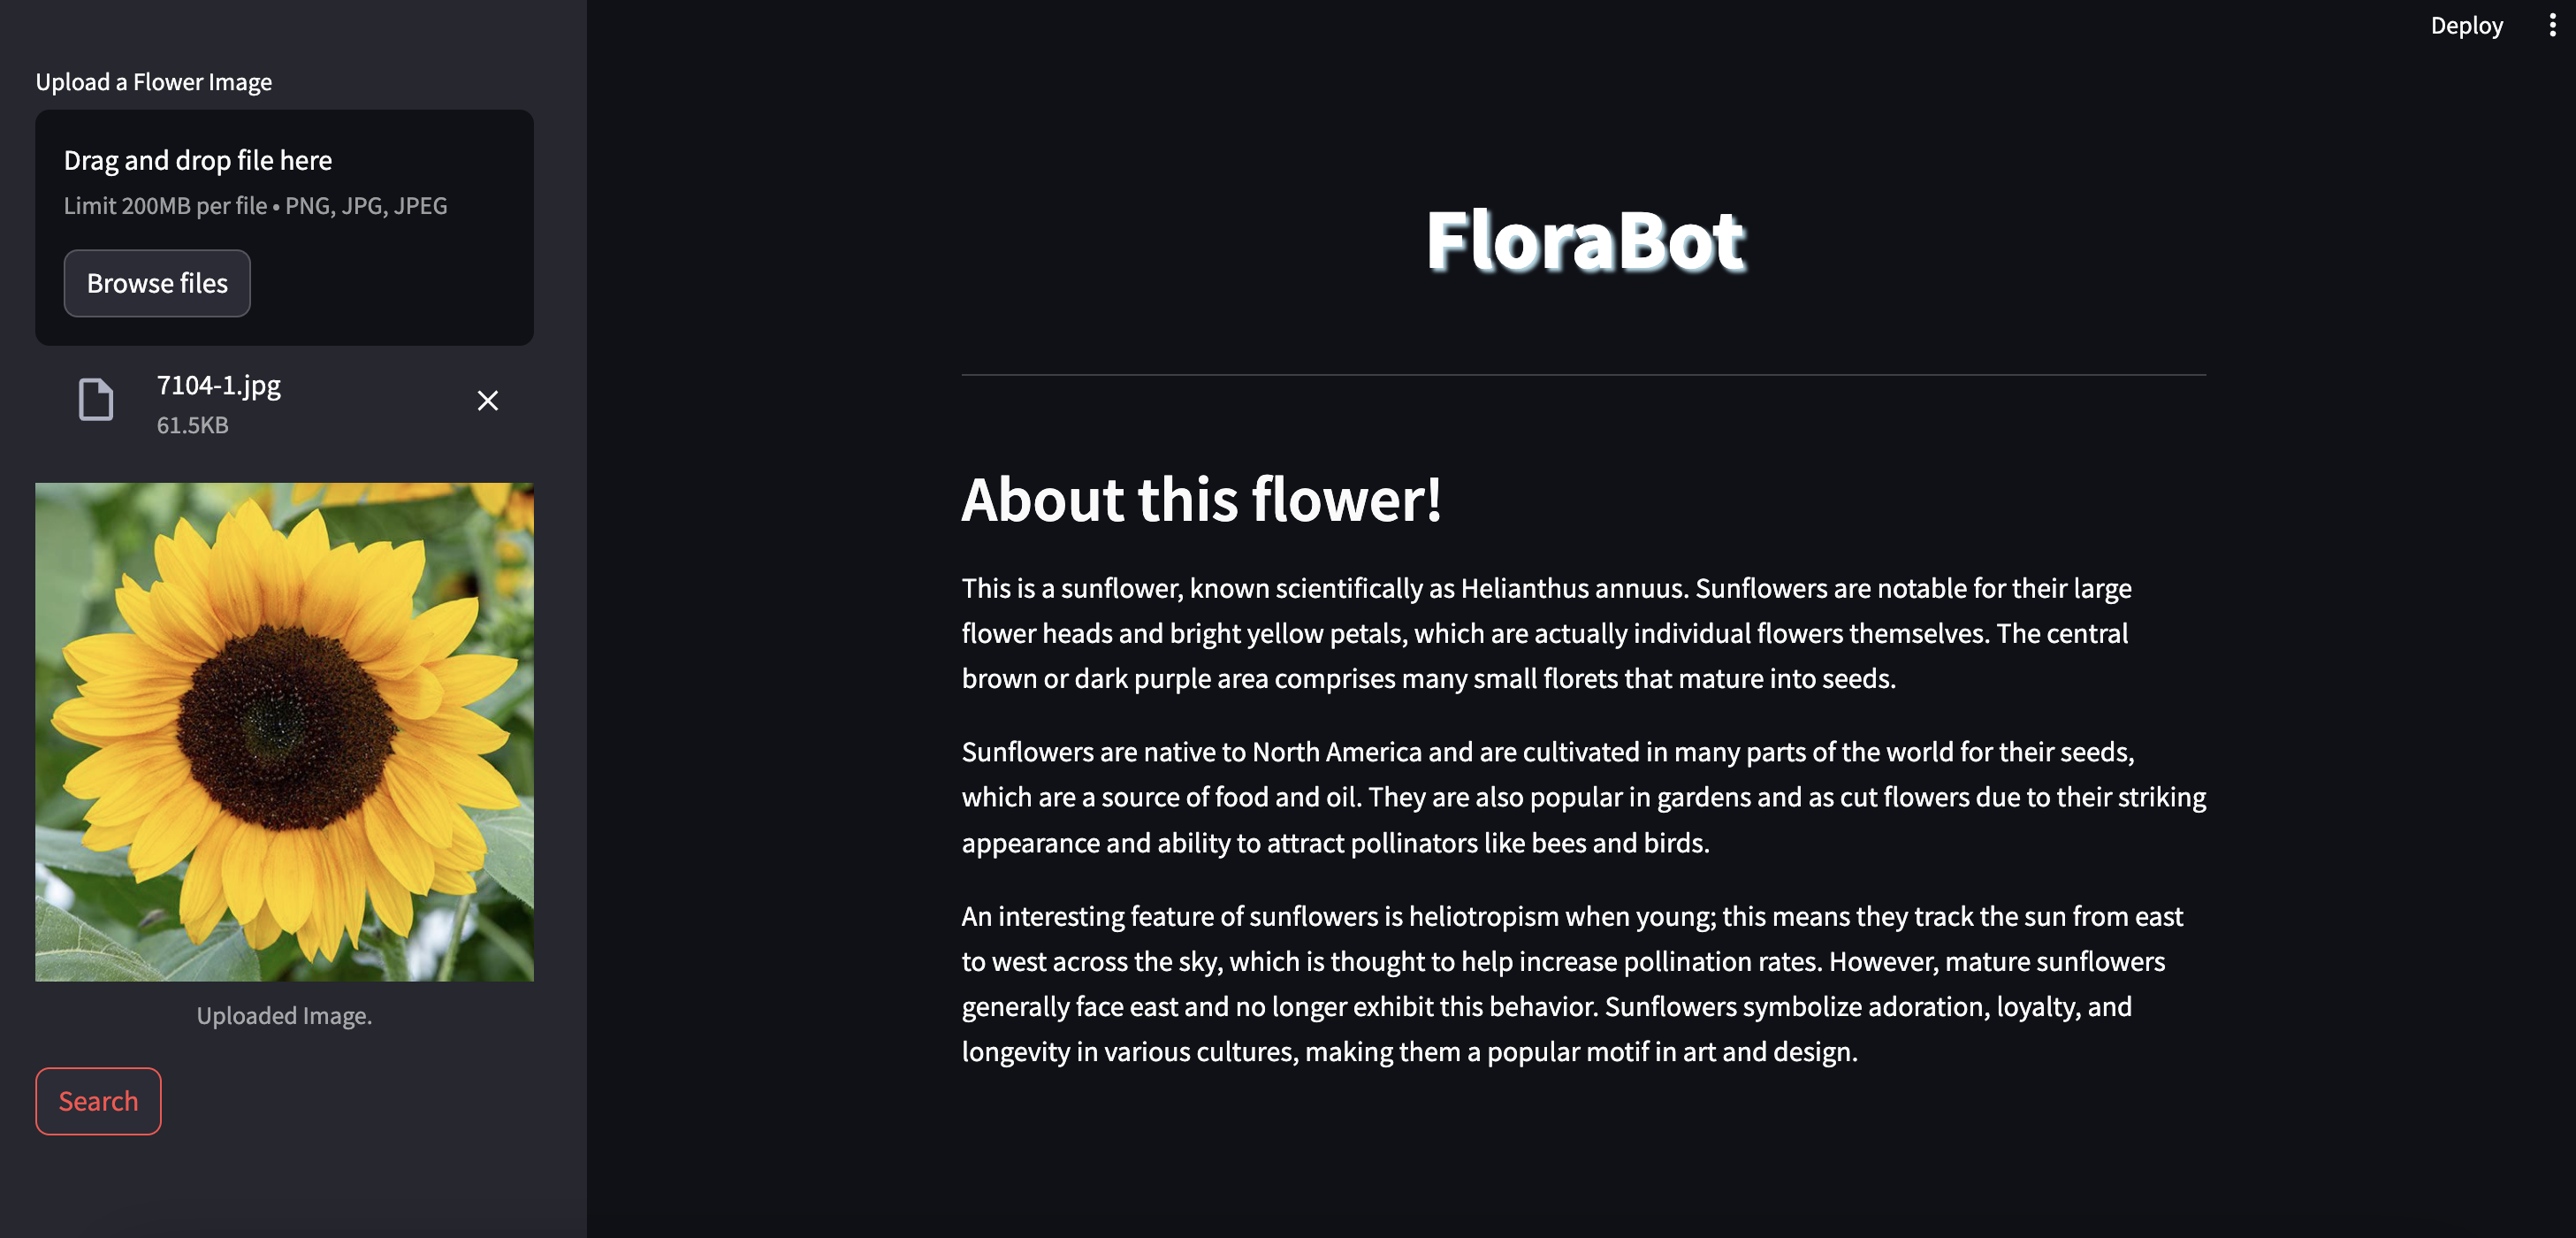

# Validation of Responses

Validating answers from generative AI, particularly in the domain of image processing, involves several crucial steps to ensure that the responses are accurate, reliable, and useful. Here are some key methods one can use to validate AI-generated results in image processing:

1. **Ground Truth Comparison**:
   - **Direct Comparison**: If possible, compare the AI's output with a known, verified result or ground truth. This can be particularly effective in tasks like image classification, segmentation, or object detection.
   - **Benchmark Datasets**: Use standard datasets that are commonly accepted in the image processing community for evaluating the performance of the model. Examples include ImageNet for classification, MS COCO for object detection, and Cityscapes for semantic segmentation.

2. **Qualitative Analysis**:
   - **Visual Inspection**: Manually inspect the generated images or processed results to evaluate their quality. This involves assessing aspects like realism, artifact presence, and alignment with expected characteristics.
   - **Expert Review**: Have experts in the field review the AI outputs to gauge their appropriateness for specific applications, ensuring the results meet industry standards.

3. **Quantitative Metrics**:
   - **Accuracy Metrics**: Use metrics such as accuracy, precision, recall, and F1-score for tasks like classification or detection. For tasks like image generation or enhancement, consider metrics like Peak Signal-to-Noise Ratio (PSNR), Structural Similarity Index (SSIM), or Learned Perceptual Image Patch Similarity (LPIPS).
   - **Error Analysis**: Perform an error analysis to identify common mistakes or weaknesses in the AI model. Understanding where the model fails can help in refining the validation process and improving the model.

4. **Consistency Checks**:
   - **Cross-Validation**: Use techniques like k-fold cross-validation to ensure that the model performs consistently across different subsets of data.
   - **A/B Testing**: Compare the performance of different AI models or different versions of the same model under the same conditions to identify which performs best.

5. **Real-World Testing**:
   - **Deployment in Controlled Settings**: Before full deployment, test the AI model in a controlled real-world environment to see how it performs under practical conditions.
   - **Feedback Loop**: Implement a system where users can provide feedback on the AI's performance. This feedback can be used to continuously improve the model.

6. **Ethical and Bias Evaluation**:
   - **Bias Detection**: Evaluate the AI model for biases, particularly in how it handles images from different demographics or environments.
   - **Ethical Review**: Ensure that the use of AI adheres to ethical guidelines, especially concerning privacy and data usage.

7. **Robustness and Security Testing**:
   - **Adversarial Testing**: Test the AI model against adversarial inputs to see if it can be easily fooled or misled.
   - **Stress Testing**: Evaluate how the model performs under extreme conditions, such as low light or high noise levels in images.


## Validation of FloraBot


On performing ground truth validation, it is clear that the flower_1 is infact belonging from that of a Camillia species and flower_2 is a sunflower. The details about these flowers are provided with little anecdotes as prompted in our code.

The correct classification of the flower proves that the model is accurate and reliable. 

# Conclusion

The image-reading capabilities of generative AI models have transformed how machines understand and interact with visual content. Through sophisticated architectures and algorithms, these models are unlocking new applications and possibilities across various domains. As technology progresses, the boundary between human and machine understanding of images is set to blur further, paving the way for innovative solutions to complex visual tasks.

<a id='References'></a>
# References

1. Wikipedia
2. https://dominguezdaniel.medium.com/exploring-image-generative-ai-models-9359705b15d3
3. https://medium.com/@taynarajacon/image-generative-ai-a-beginners-guide-8e3563b8e2ed



<a id='License'></a>
# License 

MIT License

Copyright (c) 2024 Nidhi Nitin Kulkarni

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.